# Question 1

## Part 1 - Language modelling

## Pre-processing

In [1]:
import nltk
from nltk.corpus import twitter_samples

#the corpora is divided into negative tweets, positive tweets and uncategorized tweets
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [2]:
# divide the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = twitter_samples.strings('tweets.20150430-223406.json')

print("There are " + str(len(positive_tweets)) + " positive tweets and " + str(len(negative_tweets)) + " negative tweets")
print("The uncategorized dataset has " + str(len(all_tweets)) + " tweets")

There are 5000 positive tweets and 5000 negative tweets
The uncategorized dataset has 20000 tweets


Let us look at a couple of tweets

In [3]:
print(positive_tweets[250])
print(positive_tweets[700])

skype was fun :-)
Check out my bro @13Mesh 2nd blogiversary! Many more awesome reviews to come :D ... http://t.co/a5xIGzTueL


Next, we want to concatenate all tweets together.

In [4]:
positive_tweets = ("".join(positive_tweets))

In [5]:
positive_tweets[0:200]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will '

Next we remove some characters.

In [6]:
import re
nltk.download('stopwords')
positive_tweets=re.sub('[^A-Za-z0-9.]+', ' ',positive_tweets)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erikkonstenius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
positive_tweets[0:200]

' FollowFriday France Inte PKuchly57 Milipol Paris for being top engaged members in my community this week Lamb2ja Hey James How odd Please call our Contact Centre on 02392441234 and we will be able to'

The text looks considerably better now.

In [139]:
from nltk import tokenize
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize words
tweet__word_tokenized = word_tokenize(positive_tweets)

# Tokenize sentences
tweet__sentence_tokenized = tokenize.sent_tokenize(positive_tweets)

# Tokenize words and sentences in one list (required format for bigrams and trigrams)
tokenized_text = []
for sentence in tweet__sentence_tokenized:
    tokenized_text.append(nltk.word_tokenize(sentence))
    
#print(tweet__word_tokenized[0:20])
#print(tweet__sentence_tokenized[0:1])
print(tokenized_text[0:1])

[['FollowFriday', 'France', 'Inte', 'PKuchly57', 'Milipol', 'Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', 'Lamb2ja', 'Hey', 'James', 'How', 'odd', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', 'Many', 'thanks', 'DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.']]


## Creating N-grams

## 1. Unigrams

In [66]:
def unigram(input_w1, data = tweet__word_tokenized):
    from nltk.tokenize import sent_tokenize, word_tokenize
    from collections import defaultdict

    tweets_num_uni = defaultdict(lambda: 0)
    tweets_prob_uni = defaultdict(lambda: 0)

    for word in data:
        tweets_num_uni[word] += 1

    for word in tweets_num_uni:
        tweets_prob_uni[word] = tweets_num_uni[word] / len(tweet__word_tokenized)
    
    return tweets_prob_uni[input_w1]

In [67]:
#unigram("When") #0.00014975789140888896
#unigram("nonexistingword") # 0 (such a sentence does not exist)
unigram("is")

0.006988701599081485

## 2. Bigrams

In [68]:
def bigram(input_w1, input_w2, data = tokenized_text):
    from nltk import bigrams
    from collections import defaultdict

    tweets_num_bi = defaultdict(lambda: defaultdict(lambda: 0))
    tweets_prob_bi = defaultdict(lambda: defaultdict(lambda: 0))

    for sentence in data:
        for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
            tweets_num_bi[w1][w2] += 1

    for w1 in tweets_num_bi:
        total_count = sum(tweets_num_bi[w1].values())
        for w2 in tweets_num_bi[w1]:
            if total_count == 0:
                tweets_prob_bi[w1][w2] = 0
            else:
                tweets_prob_bi[w1][w2] = tweets_num_bi[w1][w2] / total_count

    return tweets_prob_bi[input_w1][input_w2]

In [138]:
bigram("had", "a") #0.39473684210526316
#bigram("nonexistingword", "had") # 0 (such a sentence does not exist)
#bigram("had", "nonexistingword") # 0 (such a sentence does not exist)
#bigram(None,"I") #0.07632999228989977

0.39473684210526316

## 3. Trigrams

In [70]:
def trigram(input_w1, input_w2, input_w3, data = tokenized_text):

    from nltk import trigrams
    from collections import defaultdict

    tweets_num_tri = defaultdict(lambda: defaultdict(lambda: 0))
    tweets_prob_tri = defaultdict(lambda: defaultdict(lambda: 0))

    for sentence in data:
        for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
            tweets_num_tri[(w1, w2)][w3] += 1

    for w1_w2 in tweets_num_tri:
        total_count = float(sum(tweets_num_tri[w1_w2].values()))
        for w3 in tweets_num_tri[w1_w2]:
            if total_count == 0:
                tweets_prob_tri[w1_w2][w3] = 0
            else:
                tweets_prob_tri[w1_w2][w3] = tweets_num_tri[w1_w2][w3] / total_count

    return tweets_prob_tri[input_w1, input_w2][input_w3]

In [137]:
trigram("we","had","a") # 1.0 (only word following "we had")
#trigram("nonexistingword", "had", "a") # 0 (such a sentence does not exist)
#trigram("we", "had", "nonexistingword") # 0 (such a sentence does not exist)
#trigram(None,None,"I")

1.0

## Part 2 - Probability based on multiple N-grams

In [147]:
def weighted_n_gram(input_w1, input_w2, input_w3, unigram_weight, bigram_weight, trigram_weight, data = tokenized_text):
    if unigram_weight + bigram_weight + trigram_weight == 1:
        print(trigram(input_w1, input_w2, input_w3))
        print(bigram(input_w1,input_w2))
        print(unigram(input_w1))
        if unigram(input_w1) != 0:
            return trigram_weight * trigram(input_w1, input_w2, input_w3) + bigram_weight * bigram(input_w1,input_w2) + unigram_weight * unigram(input_w1)
        else:
            return 1
    else:
        print("Incompatible weights!")
        

In [148]:
weighted_n_gram("this","is", "ahbjasbdhasbhdajh", 0.2, 0.3, 0.5)
# calculations are weird

# TODO: 
# 1. fix missing words
# 2. Review part 2
# 
# 4. Clean (not prioritized)


0
0.06130268199233716
0.00434297885085778


0.019259400367872704

## Part 3 - Find weights that maximizes probability

In [142]:
# Generate random weights
import numpy as np
import pandas as pd

output_list = []
for i in range(10):
    generated_numbers = np.random.randint(1, 10, 3)
    total = np.sum(generated_numbers)
    weights = generated_numbers/total # interpolate weights to a 0 to 1 range.
    output = weighted_n_gram('Contact', 'Centre', 'on', weights[0], weights[1], weights[2]), weights[0], weights[1], weights[2]
    output_list.append(output)

# Convert output to dataframe
df = pd.DataFrame(output_list, columns=['Probability', 'Unigram Weight', 'Bigram Weight', "Trigram Weight"]).sort_values(by=['Probability'], ascending=False)
df

Incompatible weights!
Incompatible weights!


,Probability,Unigram Weight,Bigram Weight,Trigram Weight
8,0.750005,0.142857,0.214286,0.642857
5,0.593762,0.375000,0.062500,0.562500
0,0.562508,0.250000,0.375000,0.375000
3,0.531265,0.437500,0.062500,0.500000
1,0.452392,0.333333,0.428571,0.238095
9,0.433344,0.333333,0.466667,0.200000
7,0.384626,0.307692,0.615385,0.076923
4,0.227294,0.636364,0.272727,0.090909
2,NaN,0.500000,0.333333,0.166667
6,NaN,0.285714,0.428571,0.285714


The probabilities for this word seem to be maximized when the largest weight is given to the trigram model

<AxesSubplot:xlabel='Trigram Weight'>

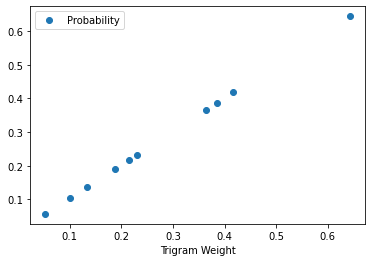

In [101]:
df.plot(x='Trigram Weight', y='Probability', style='o')

## Part 4 - Generate random sentences

In [104]:
import random

sentence = random.choices(tweet__word_tokenized, k=10)

print(sentence)

['thanks', 'it', 'your', 'because', 'lt', 'phone', 'brasso77', 'follow', 'brighten', 'we']


Only picking unigrams does not produce well phrased sentences

In [122]:
bigram_list = list(bigrams(tweet__word_tokenized, pad_left=True, pad_right=True))
#print(bigram_list)
print(bigram_list[1][0])

FollowFriday


In [134]:
sentence = []
bigram_list = list(bigrams(tweet__word_tokenized, pad_left=True, pad_right=True))

#for sentence in range(10): # 10 sentences
for i in range(10): # 10 words in each sentence
    if i % 2:
        sentence.append(str(bigram_list[i][0]))
        sentence.append(str(bigram_list[i][1]))
    else:
        sentence.append(random.choices(tweet__word_tokenized, k=1))

print(sentence)

[['you'], 'FollowFriday', 'France', ['is'], 'Inte', 'PKuchly57', ['ships'], 'Milipol', 'Paris', ['Hoping'], 'for', 'being', ['one'], 'top', 'engaged']
